In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('reviews_data.csv')

In [3]:
df.head()

,user_id,recipe_id,rating,dateLastModified
0,1313770,13988,5,2012-01-25T09:11:57.003\n
1,880574,67952,4,2012-03-24T05:37:12.64\n
2,880574,85389,5,2012-03-05T18:09:22.573\n
3,880574,218597,4,2012-03-03T10:23:05.127\n
4,880574,143069,3,2012-11-25T06:55:33.463\n


In [4]:
dishes = pd.read_csv('recipe_name.csv')

In [5]:
dishes=dishes.drop("Unnamed: 0", axis=1)

In [6]:
dishes.head()

,recipe_id,recipe_name
0,222388,Homemade Bacon
1,240488,"Pork Loin, Apples, and Sauerkraut"
2,218939,Foolproof Rosemary Chicken Wings
3,87211,Chicken Pesto Paninis
4,245714,Potato Bacon Pizza


In [7]:
df = pd.merge(df,dishes,on='recipe_id')
df.head()

,user_id,recipe_id,rating,dateLastModified,recipe_name
0,1313770,13988,5,2012-01-25T09:11:57.003\n,Marrakesh Vegetable Curry
1,364064,13988,5,2012-07-03T16:50:28.183\n,Marrakesh Vegetable Curry
2,3196461,13988,4,2012-08-29T16:16:29.987\n,Marrakesh Vegetable Curry
3,2538115,13988,3,2012-11-25T07:59:25.563\n,Marrakesh Vegetable Curry
4,1302401,13988,5,2012-05-10T17:24:15.937\n,Marrakesh Vegetable Curry


In [8]:
df=df.drop("dateLastModified",axis=1)

In [9]:
df.head()

,user_id,recipe_id,rating,recipe_name
0,1313770,13988,5,Marrakesh Vegetable Curry
1,364064,13988,5,Marrakesh Vegetable Curry
2,3196461,13988,4,Marrakesh Vegetable Curry
3,2538115,13988,3,Marrakesh Vegetable Curry
4,1302401,13988,5,Marrakesh Vegetable Curry


In [10]:
df.to_csv("final.csv")

# Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_style('white')
%matplotlib inline

In [13]:
df.groupby('recipe_name')

In [14]:
df.groupby('recipe_name')['rating']

In [15]:
df.groupby('recipe_name')['rating'].mean().head()

recipe_name
"Million Dollar" Chinese Cabbage Salad       4.750000
"Pantry Raid" Chicken Enchilada Casserole    4.695652
"Spa"ctacular Frozen Grapes                  4.200000
"Zuccotto" Cupcakes                          5.000000
#1 Pea Salad Most Requested!                 5.000000
Name: rating, dtype: float64

In [16]:
df.groupby('recipe_name')['rating'].mean().sort_values(ascending=False).head()

recipe_name
Pina Colada Punch                      5.0
Crawfish and Corn Soup                 5.0
Linzer Tarts                           5.0
Linnie's Spanish Rice                  5.0
Linguini with Cashews and Scallions    5.0
Name: rating, dtype: float64

In [17]:
df.groupby('recipe_name')['rating'].count().sort_values(ascending=False).head()

recipe_name
Fluffy Pancakes                  506
Delicious Ham and Potato Soup    470
Chicken Pot Pie IX               334
Best Chocolate Chip Cookies      329
World's Best Lasagna             301
Name: rating, dtype: int64

In [18]:
#It may happen that there are only few ratings for a particular dish, for example only one 5 start rating should not indicate that the dish is good 

In [19]:
rating_details = pd.DataFrame(df.groupby('recipe_name')['rating'].mean())
rating_details.head()

,rating
recipe_name,
"""Million Dollar"" Chinese Cabbage Salad",4.750000
"""Pantry Raid"" Chicken Enchilada Casserole",4.695652
"""Spa""ctacular Frozen Grapes",4.200000
"""Zuccotto"" Cupcakes",5.000000
#1 Pea Salad Most Requested!,5.000000


In [20]:
rating_details['count'] = pd.DataFrame(df.groupby('recipe_name')['rating'].count())

In [21]:
rating_details.head()

,rating,count
recipe_name,,
"""Million Dollar"" Chinese Cabbage Salad",4.750000,4
"""Pantry Raid"" Chicken Enchilada Casserole",4.695652,23
"""Spa""ctacular Frozen Grapes",4.200000,5
"""Zuccotto"" Cupcakes",5.000000,6
#1 Pea Salad Most Requested!,5.000000,2


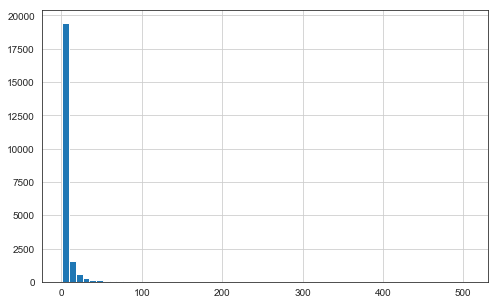

In [22]:
plt.figure(figsize=(8,5))
rating_details['count'].hist(bins=60)

In [23]:
#As we see number of ratings for all dishes are less than 100

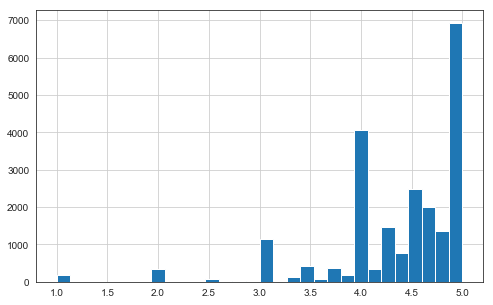

In [24]:
plt.figure(figsize=(8,5))
rating_details['rating'].hist(bins=30)

In [25]:
#The ratings given are majorly spread in the 3 to 5 rating region

# Recommendation

In [26]:
data = df.pivot_table(index='user_id',columns='recipe_name',values='rating')
#Levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.
data.head()

recipe_name,"""Million Dollar"" Chinese Cabbage Salad","""Pantry Raid"" Chicken Enchilada Casserole","""Spa""ctacular Frozen Grapes","""Zuccotto"" Cupcakes",#1 Pea Salad Most Requested!,#1 Pumpkin Spice Cookies,"'Adios, Turkey' Casserole",'But Why Is The Rum Gone?' Grilled Shrimp,'Calabacitas Guisada' (Stewed Mexican Zucchini),'Chinese Buffet' Green Beans,...,Zucchini e Pomodori Gratinati (Zucchini and Tomato Gratin),Zucchini for Lunch,Zucchini with Chickpea and Mushroom Stuffing,Zucchini with Farfalle,Zucchini with Mushroom Ravioli in Truffle Butter Sauce,Zucchini-Chocolate Chip Muffins,Zuppa Inglese,Zuppa Toscana,Zwetschekuchen (German Plum Tart),simplylo's Oven-Baked Sesame Chicken
user_id,,,,,,,,,,,,,,,,,,,,,
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#There will be NAN values since each user has not rated all dishes

In [28]:
rating_details.sort_values('count',ascending=False).head()

,rating,count
recipe_name,,
Fluffy Pancakes,4.837945,506
Delicious Ham and Potato Soup,4.853191,470
Chicken Pot Pie IX,4.805389,334
Best Chocolate Chip Cookies,4.537994,329
World's Best Lasagna,4.787375,301


In [29]:
import warnings
warnings.filterwarnings("ignore")
rating_details[rating_details.sort_values('count',ascending=False)['count']>10].count()

rating    2692
count     2692
dtype: int64

In [30]:
rating_details[rating_details.sort_values('count',ascending=False)['count']>5].count()

rating    5188
count     5188
dtype: int64

In [31]:
rating_details[rating_details.sort_values('count',ascending=False)['count']>20].count()

rating    1184
count     1184
dtype: int64

In [32]:
#Lets take threshold as 10

In [33]:
#Lets take fluffy pancakes and try to find next suggestion/recommendation

In [34]:
user_ratings = data['Fluffy Pancakes']
user_ratings[user_ratings>0].head()

user_id
30007    5.0
35215    5.0
45133    5.0
47412    4.0
57499    5.0
Name: Fluffy Pancakes, dtype: float64

In [35]:
similar= data.corrwith(user_ratings)
#Finding correlation between pivot table and Fluffy Pancakes

In [36]:
similar.head()

recipe_name
"Million Dollar" Chinese Cabbage Salad      NaN
"Pantry Raid" Chicken Enchilada Casserole   NaN
"Spa"ctacular Frozen Grapes                 NaN
"Zuccotto" Cupcakes                         NaN
#1 Pea Salad Most Requested!                NaN
dtype: float64

In [37]:
#Removing NA values from this

In [38]:
corr = pd.DataFrame(similar,columns=['Correlation'])
corr.dropna(inplace=True)
corr.head()

,Correlation
recipe_name,
Alfredo Sauce,1.000000
All-Day Apple Butter,-1.000000
Apple Crisp II,-0.166667
Apple Pie by Grandma Ople,-0.301511
Asian Orange Chicken,0.500000


In [39]:
#Now some correlations dont make sense because number of rating are very less say 1 or 2 so we incorporate number of ratings as well in correlation

In [40]:
corr = corr.join(rating_details['count'])
corr.head()

,Correlation,count
recipe_name,,
Alfredo Sauce,1.000000,80
All-Day Apple Butter,-1.000000,54
Apple Crisp II,-0.166667,228
Apple Pie by Grandma Ople,-0.301511,266
Asian Orange Chicken,0.500000,47


In [41]:
corr[corr['count']>10].sort_values('Correlation',ascending=False).head(10)
#We will give 10 recommendations

,Correlation,count
recipe_name,,
Alfredo Sauce,1.0,80
Boardwalk Quality Maple Walnut Fudge,1.0,23
Sweet Potato Pie I,1.0,71
Super-Delicious Zuppa Toscana,1.0,112
Simple Turkey Chili,1.0,64
Refried Beans Without the Refry,1.0,122
Four Egg Yellow Cake,1.0,20
Fluffy Peanut Butter Frosting,1.0,60
"Chicken with Garlic, Basil, and Parsley",1.0,29


In [42]:
corr[corr['count']>10].sort_values('Correlation',ascending=False).index.to_frame(index=False).head(10)
#This is what we need

,recipe_name
0,Alfredo Sauce
1,Boardwalk Quality Maple Walnut Fudge
2,Sweet Potato Pie I
3,Super-Delicious Zuppa Toscana
4,Simple Turkey Chili
5,Refried Beans Without the Refry
6,Four Egg Yellow Cake
7,Fluffy Peanut Butter Frosting
8,"Chicken with Garlic, Basil, and Parsley"
9,Buttermilk Pancakes II


In [43]:
#Automation

In [44]:
# input_dish = input("Please enter the name of the recipe\n")
# while input_dish not in dishes.index:
#         print("\n" + input_dish +"?")
#         print("Invalid option")
#         input_dish = input("Please enter the name of the recipe\n")

In [49]:
df = pd.read_csv('reviews_data.csv')
dishes = pd.read_csv('recipe_name.csv')
dishes=dishes.drop("Unnamed: 0", axis=1)
df = pd.merge(df,dishes,on='recipe_id')
data = df.pivot_table(index='user_id',columns='recipe_name',values='rating') 
df=df.drop("dateLastModified",axis=1)
data = df.pivot_table(index='user_id',columns='recipe_name',values='rating')

In [76]:
input_dish = input("Please enter the name of the recipe\n")
while input_dish not in data.head().columns:
        print("\n" + input_dish +"?")
        print("Invalid option")
        input_dish = input("Please enter the name of the recipe\n")
user_ratings=data[input_dish]
similar=data.corrwith(user_ratings)
corr=pd.DataFrame(similar,columns=['Correlation'])
corr.dropna(inplace=True)
corr = corr.join(rating_details['count'])
ans=corr[corr['count']>10].sort_values('Correlation',ascending=False).index.to_frame(index=False)
ans[ans['recipe_name']!=input_dish].head(10)

Please enter the name of the recipe
Belgian Waffles


,recipe_name
1,Robbi's M&Ms® Cookies
